In [85]:
import pandas as pd

bike = pd.read_csv("실습 파일/bike.csv")
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,336
10882,2012-12-19 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,241
10883,2012-12-19 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,168
10884,2012-12-19 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,129


In [86]:
bike['datetime'] = pd.to_datetime(bike['datetime'])


In [87]:
bike.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,181.144454


C:\Users\campus2H018\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


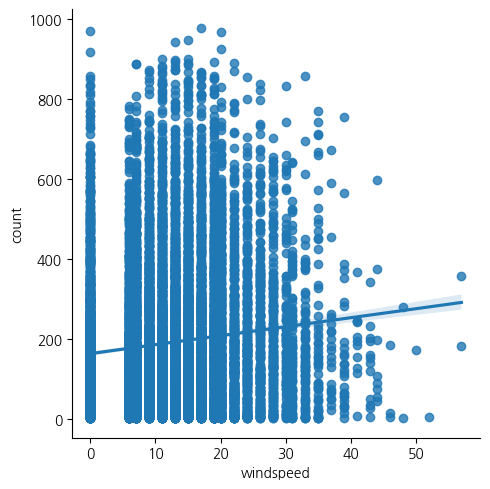

In [88]:
import seaborn as sns

sns.lmplot(data = bike, x='windspeed', y='count')

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error


data = bike.iloc[:,:-2]
y = bike['count']

data['year'] = bike.datetime.dt.year
data['month'] = bike.datetime.dt.month
data['day'] = bike.datetime.dt.day

In [96]:
category_lst = ['season', 'holiday', 'workingday', 'weather']

for i in category_lst:
    data[i] = data[i].astype(str)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   year        10886 non-null  int32         
 10  month       10886 non-null  int32         
 11  day         10886 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1), object(4)
memory usage: 893.1+ KB


In [97]:
X = data[['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity']]

In [98]:
X = pd.get_dummies(X)
X

,temp,atemp,humidity,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,True,False,False,False,True,False,True,False,True,False,False,False
1,9.02,13.635,80,True,False,False,False,True,False,True,False,True,False,False,False
2,9.02,13.635,80,True,False,False,False,True,False,True,False,True,False,False,False
3,9.84,14.395,75,True,False,False,False,True,False,True,False,True,False,False,False
4,9.84,14.395,75,True,False,False,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,False,False,False,True,True,False,False,True,True,False,False,False
10882,14.76,17.425,57,False,False,False,True,True,False,False,True,True,False,False,False
10883,13.94,15.910,61,False,False,False,True,True,False,False,True,True,False,False,False
10884,13.94,17.425,61,False,False,False,True,True,False,False,True,True,False,False,False


In [113]:
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.2)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

lr = LinearRegression()
lr.fit(train_scaled, train_y)
print(lr.score(test_scaled, test_y), lr.score(train_scaled, train_y))

mean_absolute_error(test_y, lr.predict(test_scaled)), mean_squared_error(test_y, lr.predict(test_scaled))


0.28048453687255404 0.2747148721384135


(116.51007412578184, 23251.59025325982)

In [109]:
X = data[['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity']]

X = pd.get_dummies(X)
X

train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.2)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

rf = RandomForestRegressor()
rf.fit(train_scaled, train_y)

rf.score(test_scaled, test_y),rf.score(train_scaled, train_y)

(0.2711288285820169, 0.6532309599726146)

#### 강사님

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error


bike = pd.read_csv("실습 파일/bike.csv")

del bike['windspeed']

bike['datetime'] = pd.to_datetime(bike['datetime'])
bike = bike.set_index('datetime')


data = bike.iloc[:,-2].to_numpy()
y = bike['count'].to_numpy()

train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.2)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

rf = RandomForestRegressor()
rf.fit(train_scaled, train_y)

rf.score(test_scaled, test_y),rf.score(train_scaled, train_y)

(0.27740369592635183, 0.6505887213824275)

In [148]:
bike = pd.read_csv("실습 파일/bike.csv")

del bike['windspeed']

bike['datetime'] = pd.to_datetime(bike['datetime'])
bike = bike.set_index('datetime')

bike['year'] = bike.index.year
bike['month'] = bike.index.month
bike['day'] = bike.index.day
bike['hour'] = bike.index.hour

X = bike.drop("count", axis=1).to_numpy()
y = bike['count'].to_numpy()

train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.2)

rf = RandomForestRegressor()
rf.fit(train_x, train_y)

rf.score(test_x, test_y),rf.score(train_x, train_y)

(0.9690470324621354, 0.9950755530176872)

<Axes: xlabel='hour', ylabel='count'>

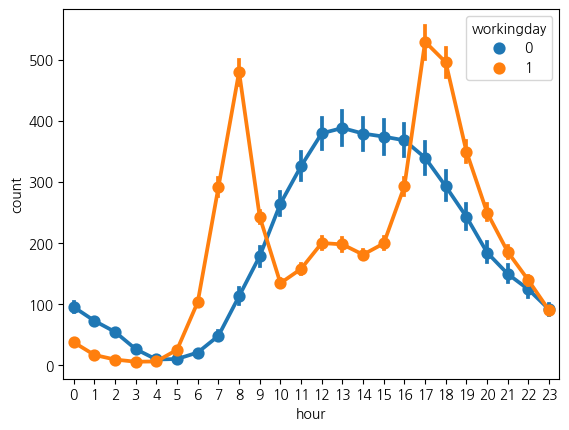

In [149]:
sns.pointplot(data=bike, x='hour',y='count', hue='workingday')

<Axes: xlabel='hour', ylabel='count'>

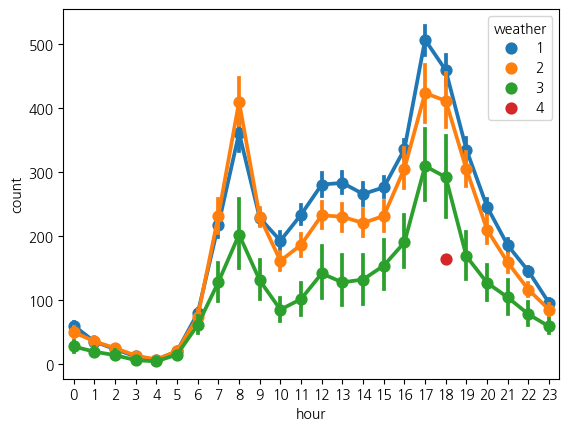

In [150]:
sns.pointplot(data=bike, x='hour',y='count', hue='weather')

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# 사과 바나나 파인애플
fruits = np.load("실습 파일/fruits_300.npy") #과일 사진 300장 (가로 100x세로 100)
fruits.shape

(300, 100, 100)

In [135]:
fruits[0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

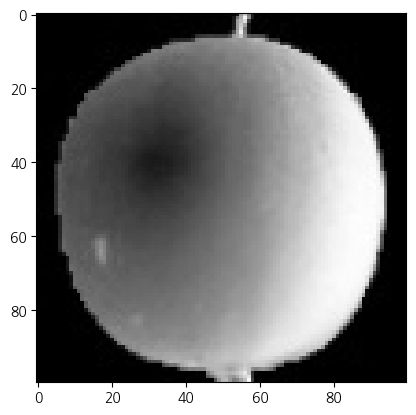

In [136]:
plt.imshow(fruits[0],cmap = 'gray')
plt.show()

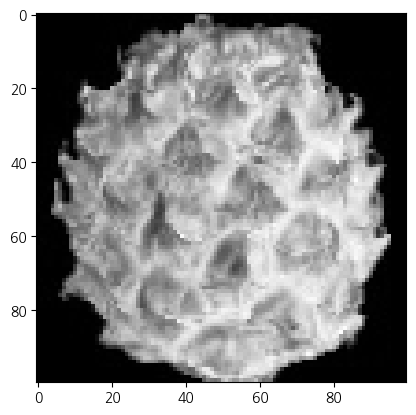

In [137]:
plt.imshow(fruits[100],cmap = 'gray')
plt.show()

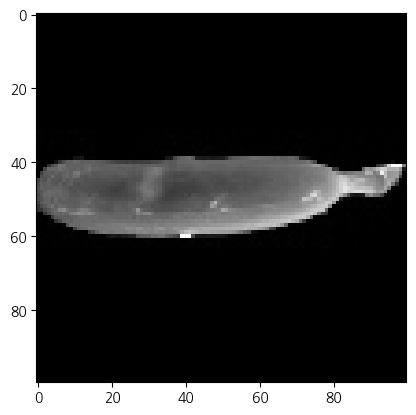

In [138]:
plt.imshow(fruits[200],cmap = 'gray')
plt.show()

### 군집분석

In [141]:
from sklearn.cluster import KMeans

fruits2 = fruits.reshape(300,10000)

# 문제지에 3개의 옵션이 있다는 건 알려주는 것
# 3종류의 패턴을 찾아랏!
km = KMeans(n_clusters=3)
km.fit(fruits2)

C:\Users\campus2H018\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\campus2H018\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

In [142]:
target = km.labels_
target

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

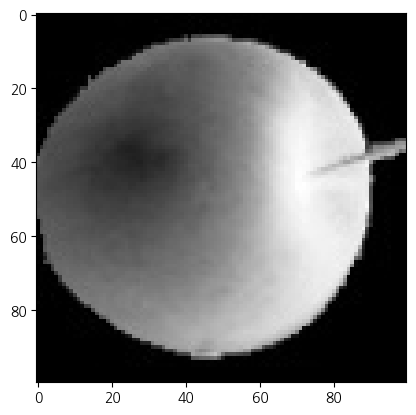

In [146]:
plt.imshow(fruits[42],cmap = 'gray')
plt.show()

C:\Users\campus2H018\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\campus2H018\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\campus2H018\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\campus2H018\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

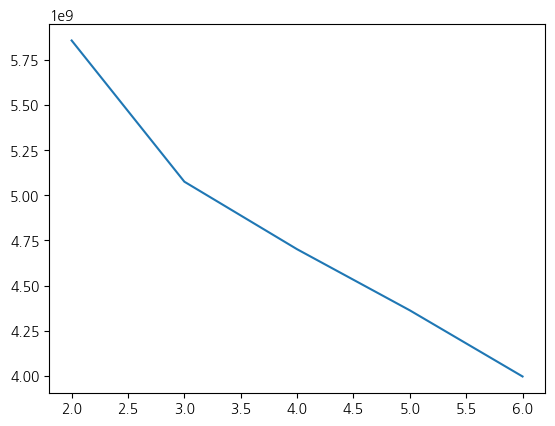

In [147]:
# 데이터에 3가지 과일이 있는 줄 모르는 경우
# 시뮬레이션을 돌리는 것
# 가장 심하게 꺾이는 부분이 최적일테다

box = []
for n in range(2, 7):
    km = KMeans(n_clusters=n)
    km.fit(fruits2)
    box.append(km.inertia_)

plt.plot(range(2,7), box)

In [184]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
pima = pd.read_csv("실습 파일/pima_indians.csv")
X = pima.iloc[:, :-1].to_numpy()
y = pima['Class'].to_numpy()

train_x, test_x, train_y, test_y = train_test_split(X, y)

smote = SMOTE()
train_x2, train_y2 = smote.fit_resample(train_x, train_y)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x2)
test_scaled = ss.transform(test_x)

In [185]:
# return_counts는 각각의 데이터 개수도 셀 수 있음

np.unique(train_y2, return_counts=True)

(array([0, 1], dtype=int64), array([372, 372], dtype=int64))

In [186]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid={'n_neighbors':range(1,101)},
                          scoring='accuracy') #원래 교차검증도 해야하지만 시간 오래걸리니깐^^
grid_search.fit(train_scaled, train_y2)

best_model1 = grid_search.best_estimator_

In [187]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

grid_search = GridSearchCV(lg, param_grid={'C':[0.01,0.1,1,10]},
                          scoring='accuracy') #원래 교차검증도 해야하지만 시간 오래걸리니깐^^
grid_search.fit(train_scaled, train_y2)

best_model2 = grid_search.best_estimator_

In [188]:
dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, param_grid={'max_depth':range(1,21)},
                          scoring='accuracy') #원래 교차검증도 해야하지만 시간 오래걸리니깐^^
grid_search.fit(train_scaled, train_y2)

best_model3 = grid_search.best_estimator_

### Stacking Model

- 장점 : 성능이 좋아질 가능성이 있다
- 단점 : 모델을 여러개 만들어서 학습을 시켜야 함으로, 자원소모가 심함

앙상블이랑 동일한 과정...?

In [189]:
a = best_model1.predict_proba(train_scaled)[:,1]
b = best_model2.predict_proba(train_scaled)[:,1]
c = best_model3.predict_proba(train_scaled)[:,1]

result = pd.DataFrame({'A':a,'B':b,'C':c})
result['target'] = train_y2
result

,A,B,C,target
0,1.0,0.956993,0.911243,1
1,0.0,0.296952,0.637037,0
2,0.0,0.224406,0.637037,0
3,0.0,0.128366,0.156250,0
4,0.0,0.291640,0.212500,0
...,...,...,...,...
739,1.0,0.569687,0.637037,1
740,1.0,0.841146,0.911243,1
741,1.0,0.946347,0.911243,1
742,1.0,0.357563,0.637037,1


In [190]:
X = result.iloc[:,:-1].to_numpy()
y = result['target'].to_numpy()

rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [191]:
a2 = best_model1.predict_proba(test_scaled)[:,1]
b2 = best_model2.predict_proba(test_scaled)[:,1]
c2 = best_model3.predict_proba(test_scaled)[:,1]

result = pd.DataFrame({'A':a2,'B':b2,'C':c2})
result

,A,B,C
0,0.0,0.191525,0.055556
1,1.0,0.614281,0.911243
2,0.0,0.238946,0.055556
3,1.0,0.443027,0.156250
4,1.0,0.347818,0.637037
...,...,...,...
187,0.0,0.239401,0.000000
188,0.0,0.107354,0.000000
189,0.0,0.371048,0.000000
190,0.0,0.846937,0.594595


In [193]:
from sklearn.metrics import classification_report

pred = rf.predict(result.to_numpy())

report = classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       128
           1       0.48      0.52      0.50        64

    accuracy                           0.65       192
   macro avg       0.61      0.62      0.61       192
weighted avg       0.66      0.65      0.65       192



In [194]:
result = pd.DataFrame({'A':a2,'B':b2,'C':c2})
result['target'] = test_y
result


,A,B,C,target
0,0.0,0.191525,0.055556,0
1,1.0,0.614281,0.911243,0
2,0.0,0.238946,0.055556,0
3,1.0,0.443027,0.156250,0
4,1.0,0.347818,0.637037,1
...,...,...,...,...
187,0.0,0.239401,0.000000,0
188,0.0,0.107354,0.000000,0
189,0.0,0.371048,0.000000,0
190,0.0,0.846937,0.594595,1
